<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

<h2 align="left"><font color='white'>Problem:</font></h2>

***This project is a time series project related to financial markets. The different features are explained in the table below. The purpose of this project is to perform various modeling and analysis and reviews on the relevant dataset. Finally, it is predicted what the trend will be like in the next 10 or 20 days, for example. However, in such cases, it is definitely not possible to make a prediction with a high percentage of confidence, because the issues related to the market are somewhat unpredictable and depend on various factors.***

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>ticker</b></td>
<td>tickers are a visual shorthand that businesses can use to imbue their brand identity with a deeper meaning. While great business names can create a deep meaning too, symbols can be more consequential.</td>
</tr>
<tr>
<td><b>close </b></td>
<td>  The close is simply the end of a trading session in the financial markets</td>
</tr>
<tr>
 <tr style="background-color:pink; color: black;">
<td><b>open</b></td>
<td><br> An open market is an economic system with no trade barriers to free market activities. </td>
</tr>
<tr>
<td><b>High</b></td>
<td> High- Means the highest price in a given period of time. </td>
</tr>
<tr>
<td><b>Low</b></td>
<td>Low - Means the lowest price in a given period of time. </td>
</tr>
<tr>
<td><b>volume</b></td>
<td> A stock's volume is the number of shares traded in a given period.  </td>
</tr>
<tr>
<td><b>adjclose</b></td>
<td> Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.  </td>
</tr>
<tr>   
<tr>
</tr>    
</tbody>
</table>    

<a id="import"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
!pip install yfinance

In [ ]:
# Import requierment libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from datetime import datetime, timezone
from pylab import rcParams
from matplotlib import pyplot
from scipy.stats import boxcox
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
color_list = sns.color_palette(['#F2AFEF', '#C499F3', '#7360DF', '#33186B', '#711DB0', '#C21292', '#EF4040', '#FFA732'])

<a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Dataset Overview*</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Import data
# Import data
from google.colab import drive
import pandas as pd

# Monter Google Drive
drive.mount('/content/drive')

# Chemin vers le fichier dans Google Drive
file_path = '/content/drive/My Drive/GOOG.xls'

# Lire le fichier CSV avec pandas
data = pd.read_csv(file_path)

# Afficher les premières lignes
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   


In [ ]:
# Overview from dataframe
df = pd.DataFrame(data)
df_rows_count, df_columns_count = df.shape
print(f'number of samples: {df_rows_count}')
print(f'number of columns: {df_columns_count}')
df

number of samples: 1258
number of columns: 14


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
#convert object type to datetime
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

KeyError: 'Unnamed: 0'

In [ ]:
# PRINT THE DATATYPE OF EACH COLUMN
print(df.dtypes)

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object


In [ ]:
##delete Unnamed: 0 column
df1 = df.drop("Unnamed: 0", axis='columns')

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# Data profilling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
# Convert dtype volume to float64:
df['volume'] = df['volume'].astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   float64
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 137.7+ KB


In [ ]:
# Separate object and float columns and describe both of them
df_num = df.select_dtypes(['float64'])
df_obj = df.select_dtypes(['object'])

In [ ]:
df_num.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,0.0,1.0


In [ ]:
df_obj.describe()

,ticker
count,2113
unique,1
top,GOOG
freq,2113


In [ ]:
# Setting the Date as index
df = df.set_index("Unnamed: 0")
df

KeyError: "None of ['Unnamed: 0'] are in the columns"

<a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Visualization and Analysis*</p>

⬆️ [Tabel of Contents](#contents_tabel)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

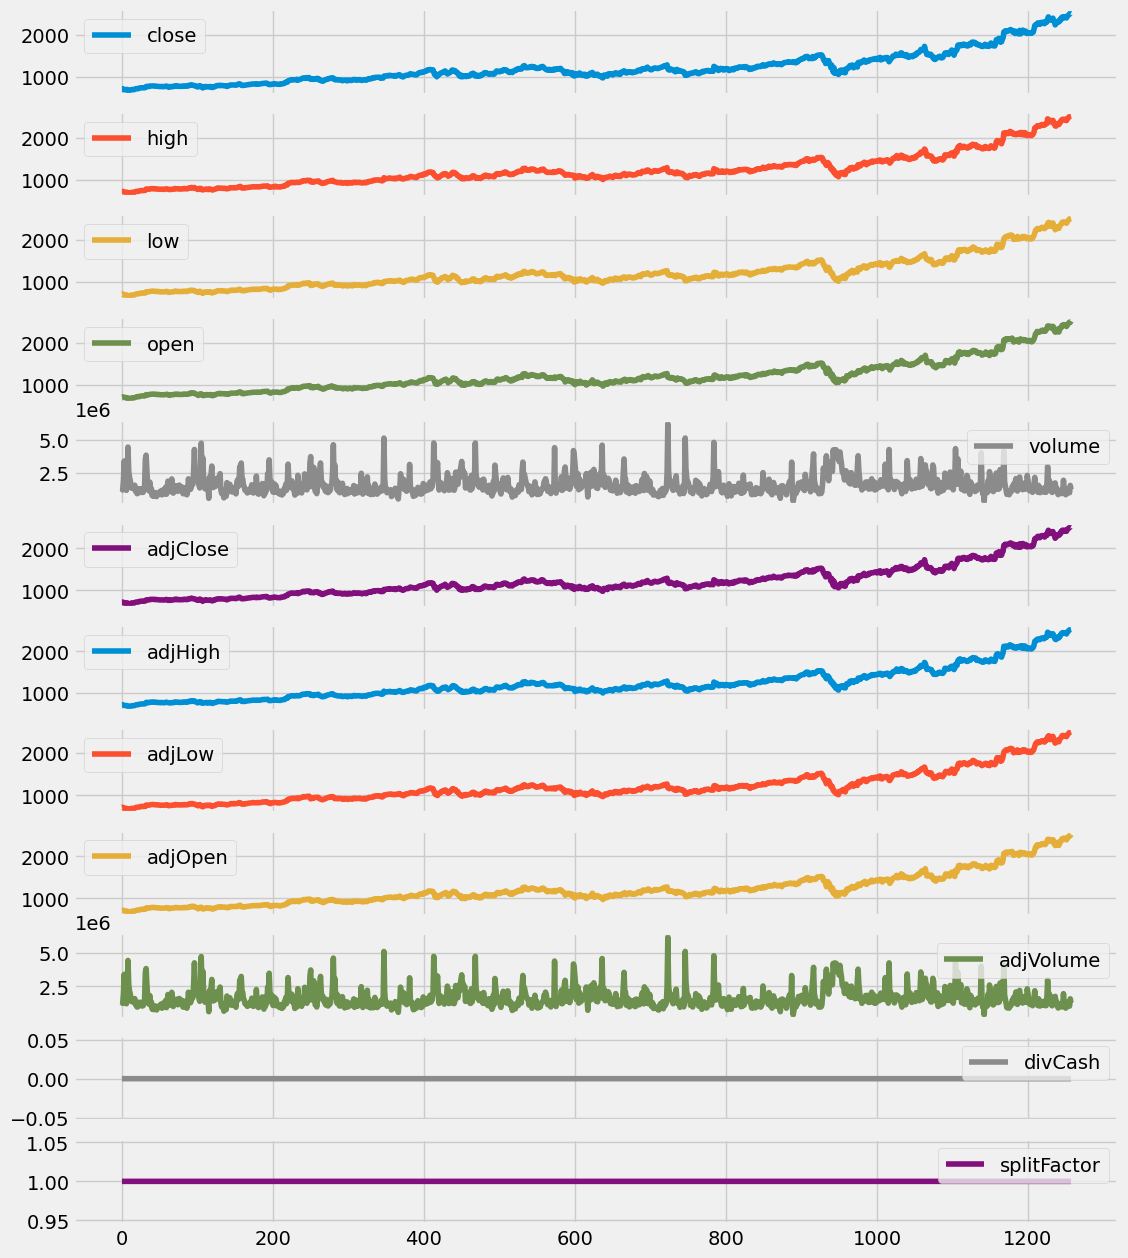

In [ ]:
plt.style.use("fivethirtyeight")
df.plot(subplots=True, figsize=(12, 15))

<h3 align="left"><font color='#C21292'>💡 Note:</font></h3>

***As can be seen in the above diagram, the values ​​of different features are displayed according to the desired date from 2016 to 2024. It can be seen that there is an upward trend in all charts, except for the volume of transactions, which fluctuates.***

In [ ]:
import calendar
import seaborn as sns
import pandas as pd
import datetime as dt

df['Unnamed: 0'] = df.index

# Splitting the Date into Year and Month
df['Year'] = df['Unnamed: 0'].dt.year
df['Month'] = df['Unnamed: 0'].dt.month

# Creating a Pivot Table with "A"
# column values and is Month indexed.
table_df = pd.pivot_table(df, values=["open"],
                                index=["Month"],
                                columns=["Year"],
                                fill_value=0,
                                margins=True)

# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
            'May', 'Jun', 'Jul', 'Aug',
            'Sep','Oct', 'Nov', 'Dec', 'All']]

# Indexing using Month Names
table_df = table_df.set_index(mon_name)

# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                robust=True, fmt='.2f',
                annot=True, linewidths=.6,
                annot_kws={'size':10},
                cbar_kws={'shrink':.5,
                        'label':'"open" values'})

# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"open" Value Analysis', pad=14)
plt.xlabel('Year')
plt.ylabel('Months')

AttributeError: Can only use .dt accessor with datetimelike values

Text(21.78333333333333, 0.5, 'Months')

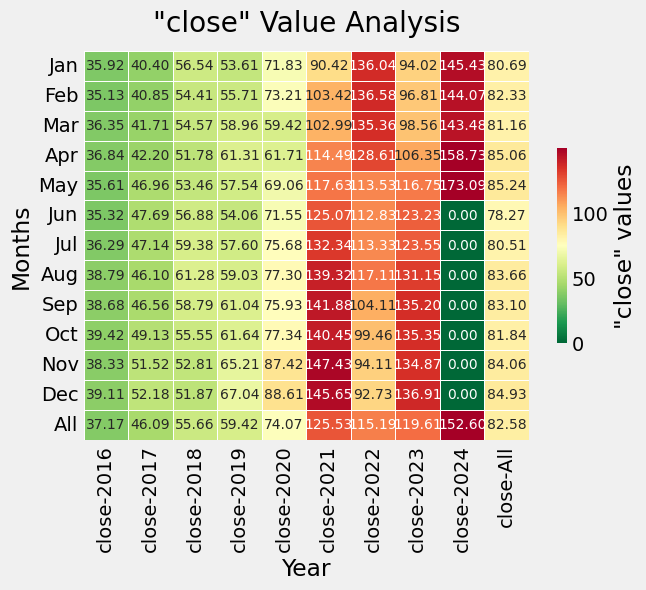

In [ ]:
df['Unnamed: 0'] = df.index

# Splitting the Date into Year and Month
df['Year'] = df['Unnamed: 0'].dt.year
df['Month'] = df['Unnamed: 0'].dt.month

# Creating a Pivot Table with "A"
# column values and is Month indexed.
table_df = pd.pivot_table(df, values=["close"],
                                index=["Month"],
                                columns=["Year"],
                                fill_value=0,
                                margins=True)

# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
            'May', 'Jun', 'Jul', 'Aug',
            'Sep','Oct', 'Nov', 'Dec', 'All']]

# Indexing using Month Names
table_df = table_df.set_index(mon_name)

# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                annot=True, linewidths=.6,
                annot_kws={'size':10},
                cbar_kws={'shrink':.5,
                        'label':'"close" values'})

# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"close" Value Analysis', pad=14)
plt.xlabel('Year')
plt.ylabel('Months')

Text(21.78333333333333, 0.5, 'Months')

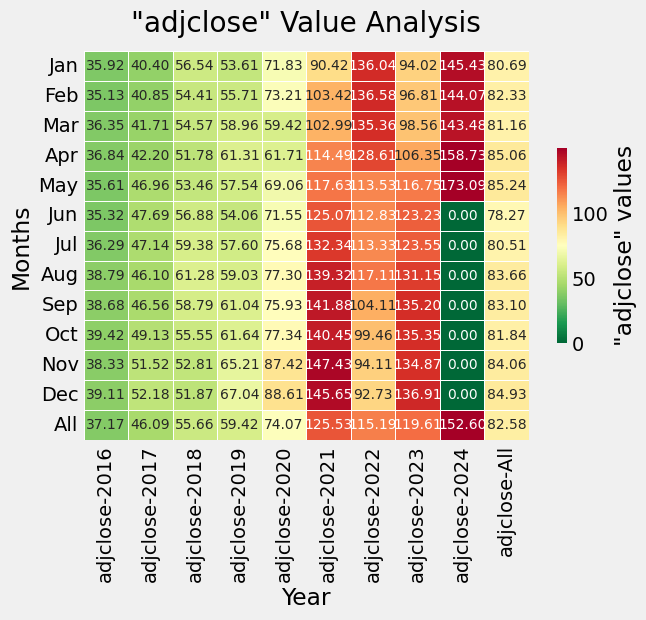

In [ ]:
df['Unnamed: 0'] = df.index

# Splitting the Date into Year and Month
df['Year'] = df['Unnamed: 0'].dt.year
df['Month'] = df['Unnamed: 0'].dt.month

# Creating a Pivot Table with "adjclose"
# column values and is Month indexed.
table_df = pd.pivot_table(df, values=["adjclose"],
                                index=["Month"],
                                columns=["Year"],
                                fill_value=0,
                                margins=True)

# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
            'May', 'Jun', 'Jul', 'Aug',
            'Sep','Oct', 'Nov', 'Dec', 'All']]

# Indexing using Month Names
table_df = table_df.set_index(mon_name)

# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                annot=True, linewidths=.6,
                annot_kws={'size':10},
                cbar_kws={'shrink':.5,
                        'label':'"adjclose" values'})

# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"adjclose" Value Analysis', pad=14)
plt.xlabel('Year')
plt.ylabel('Months')

Text(21.78333333333333, 0.5, 'Months')

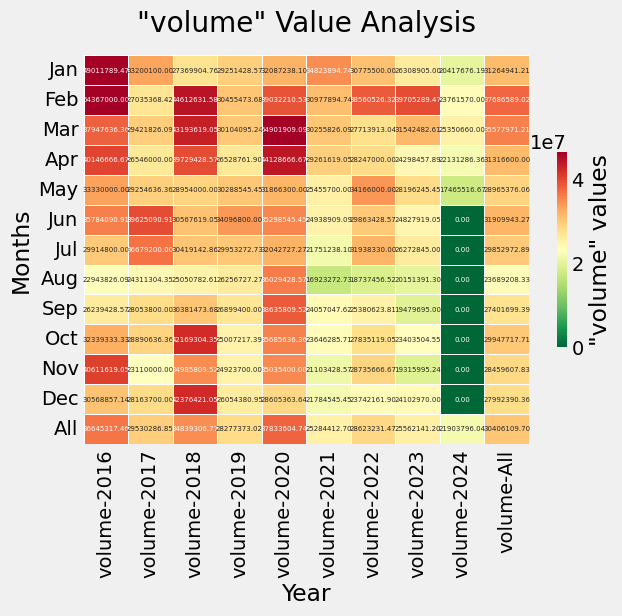

In [ ]:
df['Unnamed: 0'] = df.index

# Splitting the Date into Year and Month
df['Year'] = df['Unnamed: 0'].dt.year
df['Month'] = df['Unnamed: 0'].dt.month

# Creating a Pivot Table with "adjclose"
# column values and is Month indexed.
table_df = pd.pivot_table(df, values=["volume"],
                                index=["Month"],
                                columns=["Year"],
                                fill_value=0,
                                margins=True)

# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
            'May', 'Jun', 'Jul', 'Aug',
            'Sep','Oct', 'Nov', 'Dec', 'All']]

# Indexing using Month Names
table_df = table_df.set_index(mon_name)

# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                annot=True, linewidths=.6,
                annot_kws={'size':5},
                cbar_kws={'shrink':.5,
                        'label':'"volume" values'})

# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"volume" Value Analysis', pad=17)
plt.xlabel('Year')
plt.ylabel('Months')

<h3 align="left"><font color='#C21292'>💡 Note:</font></h3>

***As can be seen in the above tables, the average values ​​of different features have been determined on the relevant date.***

<a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Bar Plots*</p>

⬆️ [Tabel of Contents](#contents_tabel)

Text(0.5, 1.0, 'Yearly Mean open forom 2016 to 2024 ..')

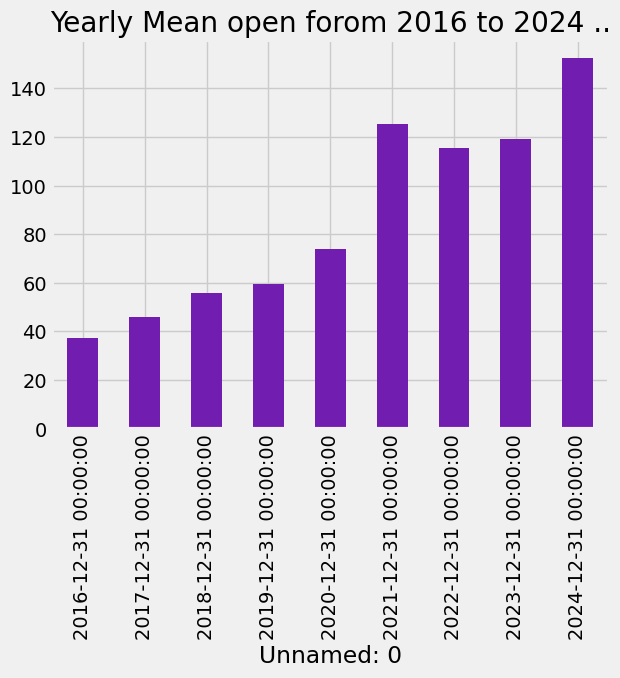

In [ ]:
df['open'].resample('YE').mean().plot(kind='bar' , color='#711DB0')
plt.title('Yearly Mean open forom 2016 to 2024 ..')

Text(0.5, 1.0, 'Yearly Mean close forom 2016 to 2024 ..')

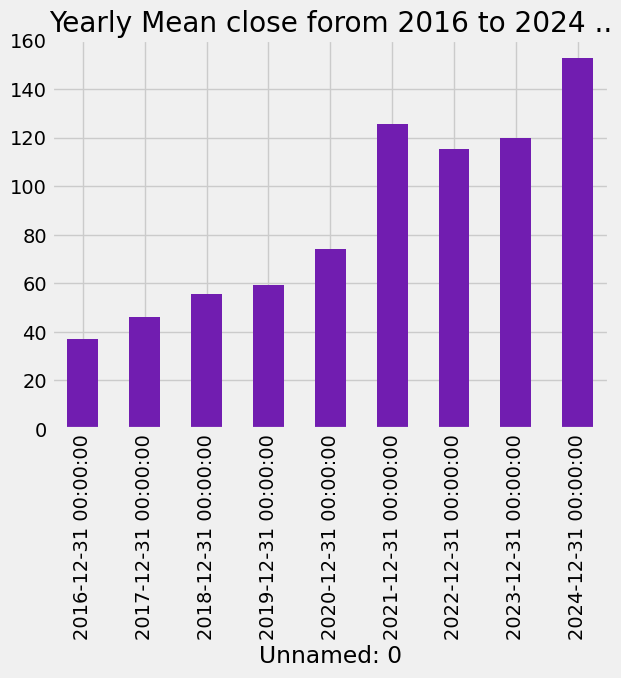

In [ ]:
df['close'].resample('YE').mean().plot(kind='bar' , color='#711DB0')
plt.title('Yearly Mean close forom 2016 to 2024 ..')

Text(0.5, 1.0, 'Yearly Mean volume forom 2016 to 2024 ..')

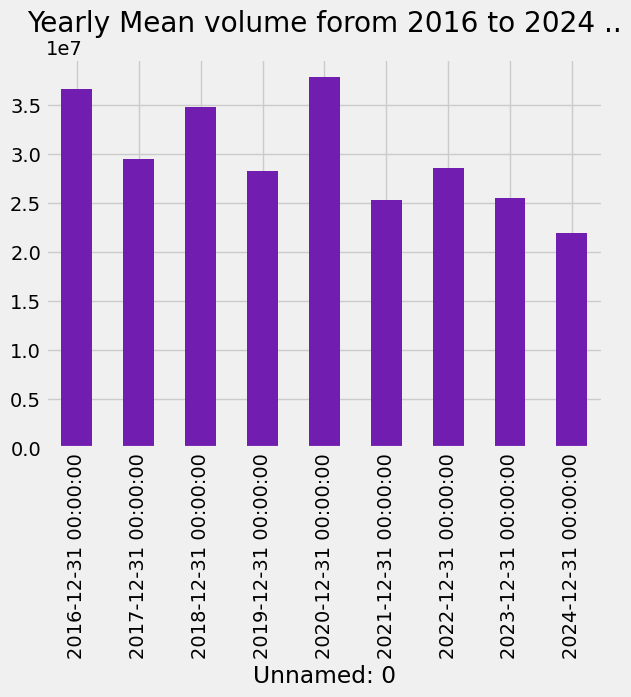

In [ ]:
df['volume'].resample('YE').mean().plot(kind='bar', color='#711DB0')
plt.title('Yearly Mean volume forom 2016 to 2024 ..')

Text(0.5, 1.0, 'Yearly Mean adjclose forom 2016 to 2024 ..')

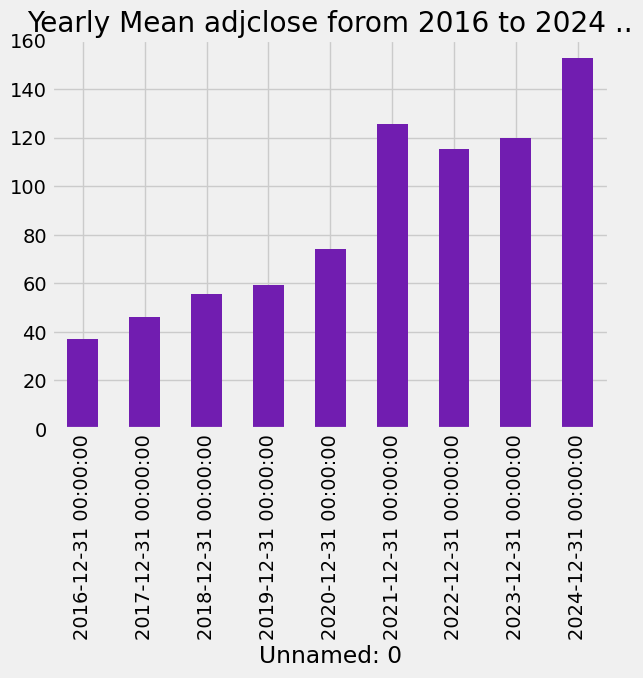

In [ ]:
df['adjclose'].resample('YE').mean().plot(kind='bar', color='#711DB0')
plt.title('Yearly Mean adjclose forom 2016 to 2024 ..')

Text(0.5, 1.0, 'Yearly Mean high forom 2016 to 2024 ..')

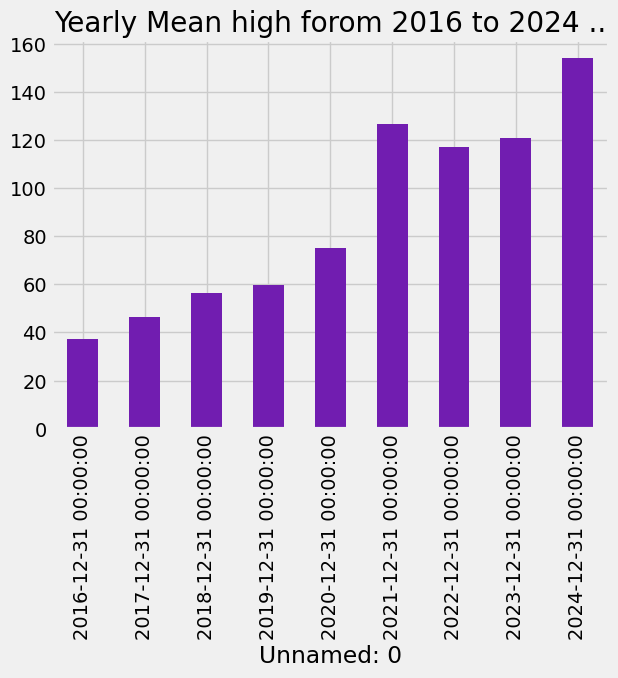

In [ ]:
df['high'].resample('YE').mean().plot(kind='bar' , color='#711DB0')
plt.title('Yearly Mean high forom 2016 to 2024 ..')

Text(0.5, 1.0, 'Yearly Mean low forom 2016 to 2024 ..')

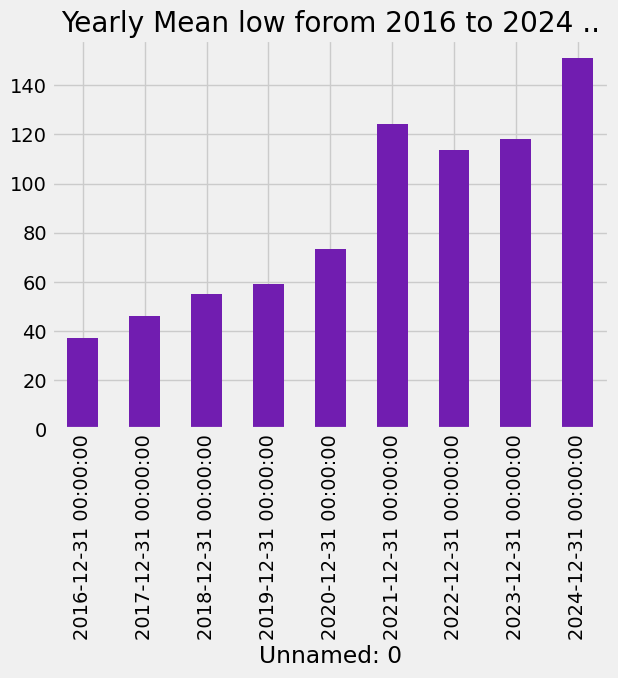

In [ ]:
df['low'].resample('YE').mean().plot(kind='bar' , color='#711DB0')
plt.title('Yearly Mean low forom 2016 to 2024 ..')

<a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Probability Distribution Function*</p>
​
⬆️ [Tabel of Contents](#contents_tabel)

/tmp/ipykernel_24/642948358.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist=df1.hist(ax = ax , color= '#711DB0')


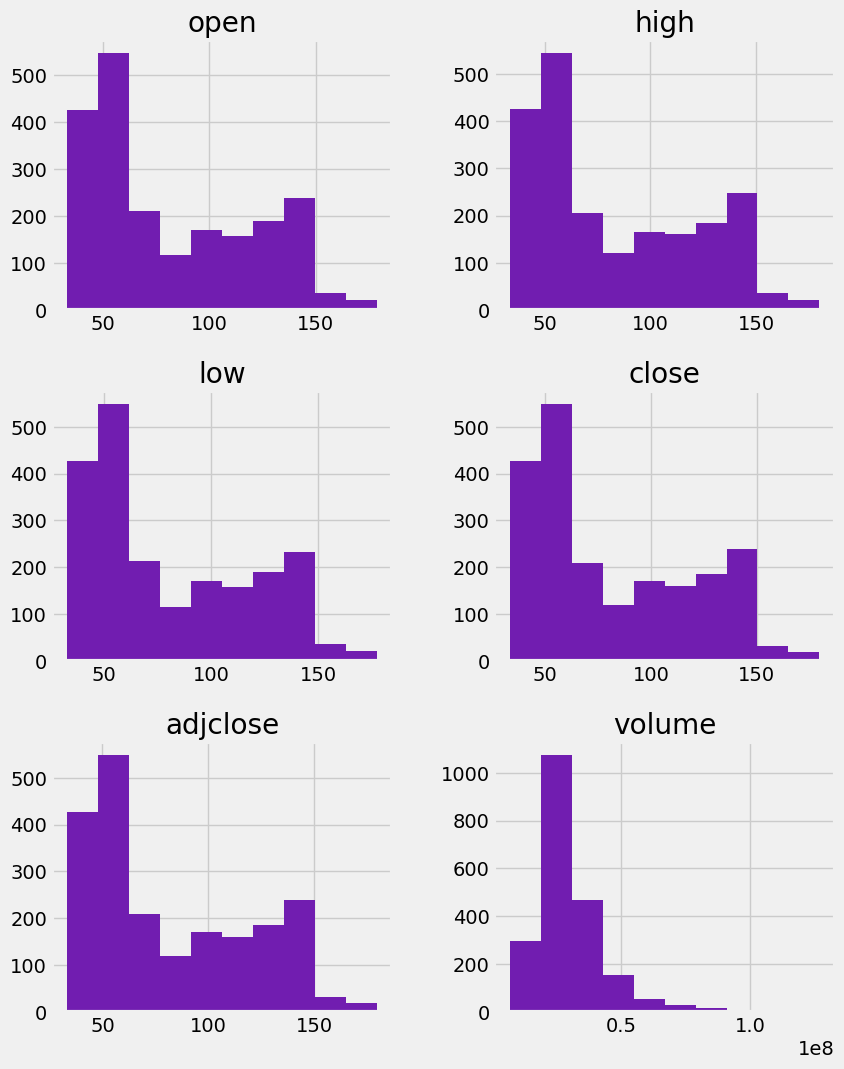

In [ ]:
fig = plt.figure(figsize = (9,12))
ax = fig.gca()
hist=df1.hist(ax = ax , color= '#711DB0')

<h3 align="left"><font color='#C21292'>💡 Note:</font></h3>

***The above graphs depict the distribution of data for each feature. According to these graphs, it is clear that the distributions related to the high, low, open, close, and adjclose features are almost similar, and the distribution related to the transaction volume is different from the others and has a normal distribution.***

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

<h2 align="left"><font color='white'>Deep Learning Models:</font></h2>
    
***Let's explore some deep learning models on the dataset. We'll try LTSM and RNN. RNN, a model designed for allowing information to persist in short term memory to predict subsequent values, should be best suited to our dataset, since we can see that autocorrelations don't show signs of seasonality, it tends to be manipulated by recent previous prices. We'll also apply LTSM, the special RNN model, which might reveal some interesting long term dependencies or relations in the dataset.***

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

<h2 align="left"><font color='white'>Time Series Forecasting using Recurrent Neural Networks (RNN) in TensorFlow:</font></h2>
    
 ***Time Series Data: Each data point in a time series is linked to a timestamp, which shows the exact time when the data was observed or recorded. Many fields, including finance, economics, weather forecasting, and machine learning, frequently employ this kind of data.
The fact that time series data frequently display patterns or trends across time, such as seasonality or cyclical patterns, is an essential feature associated with it. To make predictions or learn more about the underlying processes or occurrences being observed, these patterns can be analyzed and modeled.
Recurrent Neural Networks (RNN) model the temporal dependencies present in the data as it contains an implicit memory of previous inputs. Hence, time series data being sequential in nature is often used in RNN. For working with time series data in RNNs, TensorFlow provides a number of APIs and tools, like tf.keras.layers.RNN API, which allows to create of unique RNN cell classes and use them with data. Several RNN cell types are also supported by this API, including Basic RNN, LSTM, and GRU.
To demonstrate the same, we’re going the run the following code snippets in Google Colaboratory which comes pre-installed with Machine Learning and Deep Learning Libraries. This example will use stock price data, the most popular type of time series data.***

In [ ]:
#the start and end date
start_date = dt.datetime(2016,1,4)
end_date = dt.datetime(2024,5,24)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns',5)
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2016-01-04   38.110001   38.110001  ...   37.928471  67382000
2016-01-05   38.205002   38.459999  ...   38.032848  45216000
2016-01-06   37.518501   38.286499  ...   37.922974  48206000
...                ...         ...  ...         ...       ...
2024-05-21  176.899994  178.149994  ...  177.646118  16989400
2024-05-22  176.639999  177.149994  ...  176.177811  17880000
2024-05-23  177.070007  178.250000  ...  173.351044  21024900

[2112 rows x 6 columns]


In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(1690, 1) (422, 1)


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1690, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.03402761]
 [0.03483871]
 [0.02897747]
 [0.02732113]
 [0.02788034]]


<h3 align="left"><font color='#C21292'>💡 Note:</font></h3>

***The same data preprocessing is done for test data.***

In [ ]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.18195701] [0.17748441] [0.14639465] [0.15523066] [0.13854037]


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

<h2 align="left"><font color='white'> Deep Learning Models:</font></h2>
    
 ***The time-series data must be divided into X_train and y_train from the training set and X_test and y_test from the testing set in this phase. It is done to turn time series data into a supervised learning problem that can be utilized to train the model. The loop generates input/output sequences of length 50 while iterating through the time series data. Using this method, we can forecast future values while taking into consideration the data’s temporal dependence on prior observations.***

In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.03402761, 0.03483871, 0.02897747, 0.02732113, 0.02788034,
       0.0211141 , 0.02487074, 0.02853775, 0.01790814, 0.01173954,
       0.01607677, 0.00999354, 0.0160853 , 0.02540436, 0.02618987,
       0.02250579, 0.02279605, 0.02377791, 0.02837556, 0.03789524,
       0.0503776 , 0.04430717, 0.02651002, 0.01836066, 0.00221556,
       0.00446529, 0.01250795, 0.00591247, 0.01268725, 0.01543642,
       0.01900097, 0.02197217, 0.01426246, 0.02007247, 0.01861678,
       0.0120042 , 0.01726353, 0.02181848, 0.01643962, 0.01656768,
       0.02577578, 0.02432859, 0.02233076, 0.01821123, 0.0110565 ,
       0.01395084, 0.01933823, 0.02452925, 0.02667225, 0.02712047])]
[0.028413958726275335]

[array([0.03402761, 0.03483871, 0.02897747, 0.02732113, 0.02788034,
       0.0211141 , 0.02487074, 0.02853775, 0.01790814, 0.01173954,
       0.01607677, 0.00999354, 0.0160853 , 0.02540436, 0.02618987,
       0.02250579, 0.02279605, 0.02377791, 0.02837556, 0.03789524,
       0.0503776 , 0.04430717, 0.0

***For testing set:***

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

 ***In this step, the data is converted into a format that is suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, which was originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step.***

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (1640, 50, 1) y_train : (1640, 1)


***For testing set***:

In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (372, 50, 1) y_test : (372, 1)


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> SimpleRNN Model:</font></h2>

 ***Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.***


In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                decay=1e-6,
                                momentum=0.9,
                                nesterov=True),
                loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


  5/820 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0651

I0000 00:00:1718184909.433441     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718184909.464032     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718184909.466886     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718184909.469666     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


820/820 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.0177
Epoch 2/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0020
Epoch 3/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0018
Epoch 4/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0012
Epoch 5/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0011
Epoch 6/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0011
Epoch 7/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0010
Epoch 8/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 9.4826e-04
Epoch 9/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 8.9838e-04
Epoch 10/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 9.2900e-04
Epoch 11/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 7.9505e-04
Epoch 12/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 9.2827e-04
Epoch 13/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 7.8640e-04
Epoch 14/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 7.5112e-04
Epoch 15/20


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> LSTM RNN Model: </font></h2>
      
 ***This code creates a LSTM Model with three layers and a dense output layer. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 1, it fits the model to the training data for 10 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.***

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                    return_sequences = True,
                    input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                    return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                    loss = 'mean_squared_error')

#Fitting the model
regressorLSTM.fit(X_train,
                y_train,
                batch_size = 1,
                epochs = 10)
regressorLSTM.summary()

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0076
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 9.6464e-04
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7.5771e-04
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.6266e-04
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.9319e-04
Epoch 6/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.6750e-04
Epoch 7/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 5.3567e-04
Epoch 8/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.6824e-04
Epoch 9/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0588e-04
Epoch 10/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.4437e-04


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> GRU RNN Model: </font></h2>
      
***This code defines a recurrent neural network (RNN) model using the GRU (Gated Recurrent Unit) layer in Keras. It consists of four stacked GRU layers followed by a single output layer. It makes use of the ‘tanh’ hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Stochastic Gradient Descent (SGD) with a learning rate of 0.01, the decay rate of 1e-7, the momentum of 0.9, and Nesterov is set to False. The mean squared error is the loss function, and accuracy is the evaluation metric while compiling. With a batch size of 1, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.***

In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                    return_sequences=True,
                    input_shape=(X_train.shape[1],1),
                    activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
                    return_sequences=True,
                    activation='tanh'))

regressorGRU.add(GRU(units=50,
                    return_sequences=True,
                    activation='tanh'))

regressorGRU.add(GRU(units=50,
                    activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
                    activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                decay=1e-7,
                                momentum=0.9,
                                nesterov=False),
                    loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1975
Epoch 2/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1776
Epoch 3/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.2042
Epoch 4/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1867
Epoch 5/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1922
Epoch 6/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.2056
Epoch 7/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1907
Epoch 8/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1837
Epoch 9/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1950
Epoch 10/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1893
Epoch 11/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1850
Epoch 12/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1902
Epoch 13/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1961
Epoch 14/20
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1833
Epoch 15/20
164

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

 ***The X_test data is then used to make predictions from all three models.***

 <a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Visualize the predicted prices using matplotlib*</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


  ***The predicted values are transformed back from the normalized state to their original scale using the inverse_transform() function.***

In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

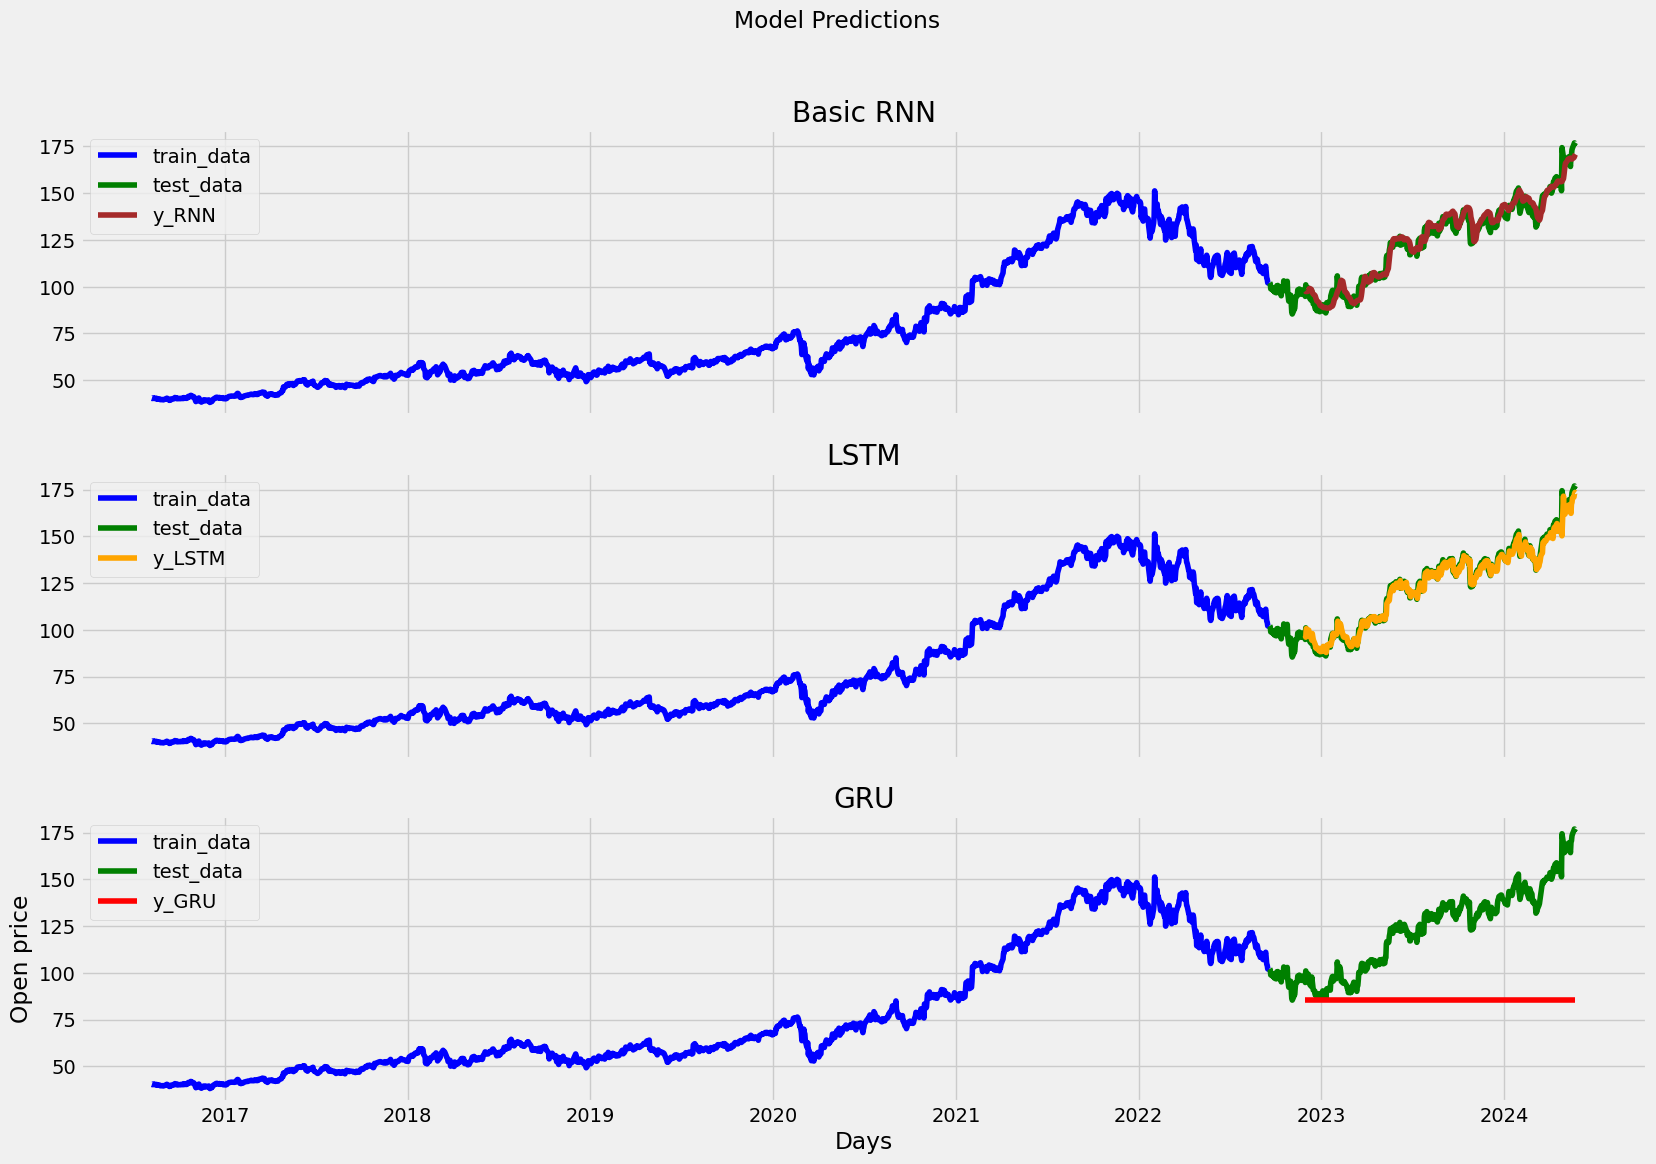

In [ ]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">

 ***Splitting the dataset into test and train We follow the common practice of splitting the data into training and testing set. We calculate the length of the training datasets and print their respective shapes to confirm the split. Generally, the split is 80:20 for training and test set.***

In [ ]:
# Train-Test Split
# Setting 80 percent data for training
training_data_len = math.ceil(len(df) * .8)
training_data_len

#Splitting the dataset
train_data = df[:training_data_len].iloc[:,:1]
test_data = df[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(1691, 1) (422, 1)


<a id="overview"></a>
# <p style="background-color:#C21292; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">  *Project Done By Pytorch*</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Preparing Training and Testing Dataset: </font></h2>
    
***Here, we are choosing the feature (‘Open’ prices), reshaping it into the necessary 2D format, and validating the resulting shape to make sure it matches the anticipated format for model input, this method prepares the training data for use in a neural network.***
    

In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(1690, 1) (422, 1)


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1690, 1)

In [ ]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape

(422, 1)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
    
***We carefully prepared the training and testing datasets to guarantee that our model could produce accurate predictions. We made the issue one that was suited for supervised learning by creating sequences with the proper lengths and their related labels.***

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Normalization: </font></h2>
    
***We have applied Min-Max scaling which is a standard preprocessing step in machine learning and time series analysis, to the dataset_test data. It adjusts the values to be between [0, 1], allowing neural networks and other models to converge more quickly and function better. The normalized values are contained in the scaled_test array as a consequence, ready to be used in modeling or analysis..***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5]) #prints the first 5 rows of scaled_test


[[0.03402761]
 [0.03483871]
 [0.02897747]
 [0.02732113]
 [0.02788034]]
[0.18195701] [0.17748441] [0.14639465] [0.15523066] [0.13854037]




<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Transforming the data into Sequence: </font></h2>
    
***In this step, it is necessary to separate the time-series data into X_train and y_train from the training set and X_test and y_test from the testing set. Time series data are transformed into a supervised learning problem that may be used to develop the model. While iterating through the time series data, the loop generates input/output sequences of length 50 for training data and sequences of length 30 for the test data. We can predict future values using this technique while taking into account the data’s temporal dependence on earlier observations. We prepare the training and testing data for a neural network by generating sequences of a given length and their related labels. It then converts these sequences to NumPy arrays and PyTorch tensors.***

In [ ]:
# Create sequences and labels for training data
sequence_length = 50 # Number of time steps to look back
X_train, y_train = [], []
for i in range(len(scaled_train) - sequence_length):
    X_train.append(scaled_train[i:i+sequence_length])
    y_train.append(scaled_train[i+1:i+sequence_length+1])
X_train, y_train = np.array(X_train), np.array(y_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train.shape,y_train.shape


(torch.Size([1640, 50, 1]), torch.Size([1640, 50, 1]))

In [ ]:
# Create sequences and labels for testing data
sequence_length = 30 # Number of time steps to look back
X_test, y_test = [], []
for i in range(len(scaled_test) - sequence_length):
    X_test.append(scaled_test[i:i+sequence_length])
    y_test.append(scaled_test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)

# Convert data to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test.shape, y_test.shape


(torch.Size([392, 30, 1]), torch.Size([392, 30, 1]))

***To make the sequences compatible with our deep learning model, the data was subsequently transformed into NumPy arrays and PyTorch tensors.***


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Define LSTM class model: </font></h2>
    
***Now, we defined a PyTorch network using LSTM architecture. The class consist of LSTM layer and linear layer. In LSTMModel class, we initialized parameters-
input_size : number of features in the input data at each time step
hidden_size : hidden units in LSTM layer
num_layers : number of LSTM layers
batch_first= True: input data will have the batch size as the first dimension
The function super(LSTMModel, self).__init__() initializes the parent class for building the neural network.
The forward method defines the forward pass of the model, where the input x is processed through the layers of the model to produce an output.***


In [ ]:
class LSTMModel(nn.Module):
    # input_size : number of features in input at each time step
    # hidden_size : Number of LSTM units
    # num_layers : number of LSTM layers
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__() #initializes the parent class nn.Module
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Defining the model: </font></h2>
    
***Now, we define the model, loss function and optimizer for the forecasting. We have adjusted the hyperparameters of the model and set the loss fuction to mean squared error. To optimize the parameters during the training, we have considered Adam optimizer.***
    

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
input_size = 1
num_layers = 2
hidden_size = 64
output_size = 1

# Define the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)


LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Creating Data Loader for batch training: </font></h2>
    
***Data loader play an essential role during the training and evaluation phase. So, we have prepared the data for batch training and testing by creating data loader objects.***

In [ ]:
batch_size = 15
# Create DataLoader for batch training
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for batch training
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Model Training & Evaluations: </font></h2>
    
***Now, we built a training loop for 50 epochs. In the provided code snippet, the model processes mini batches of training data and compute loss and update the parameters.***


In [ ]:
num_epochs = 50
train_hist =[]
test_hist =[]
# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0

    # Training
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average training loss and accuracy
    average_loss = total_loss / len(train_loader)
    train_hist.append(average_loss)

    # Validation on test data
    model.eval()
    with torch.no_grad():
         total_test_loss = 0.0

    for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            predictions_test = model(batch_X_test)
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        # Calculate average test loss and accuracy
            average_test_loss = total_test_loss / len(test_loader)
            test_hist.append(average_test_loss)
    if (epoch+1)%10==0:
        print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')


Epoch [10/50] - Training Loss: 0.0002, Test Loss: 0.0008
Epoch [20/50] - Training Loss: 0.0002, Test Loss: 0.0008
Epoch [30/50] - Training Loss: 0.0002, Test Loss: 0.0008
Epoch [40/50] - Training Loss: 0.0002, Test Loss: 0.0008
Epoch [50/50] - Training Loss: 0.0002, Test Loss: 0.0008


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Plotting the Learning Curve: </font></h2>
    
***We have plotted the learning curve to track the progress and give us an idea, how much time time and training is required by the model to understand the patterns.***
    


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Forecasting: </font></h2>
    
***After training the neural network on the provided data, now comes the forecasting for next month. The model predicts the future opening price and store the future values along with their corresponding dates. Using for loop, we are going to perform a rolling forecasting, the steps are as follows – We have set the future time steps to 20 and converted the test sequence to numpy array and remove singleton dimensions using sequence_to_plot.
Then, we have converted historical_data to a Pytorch tensor. The shape of the tensor is (1, sequence_length, 1), where sequence_length is the length of the historical data sequence.
the model further predicts the next value based on the ‘historical_data_tensor’.
The prediction is then converted to a numpy array and the first element is extracted.
Once the loop ends, we get the forecasted values, which are stored in list, and future dates are generated to create index for these values.***

In [ ]:
# Define the number of future time steps to forecast
num_forecast_steps = 20

# Convert to NumPy and remove singleton dimensions
sequence_to_plot = X_test.squeeze().cpu().numpy()

# Use the last 30 data points as the starting point
historical_data = sequence_to_plot[-1]
print(historical_data.shape)

# Initialize a list to store the forecasted values
forecasted_values = []

# Use the trained model to forecast future values
with torch.no_grad():
     for _ in range(num_forecast_steps*2):
        # Prepare the historical_data tensor
        historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
        # Use the model to predict the next value
        predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]

        # Append the predicted value to the forecasted_values list
        forecasted_values.append(predicted_value[0])

        # Update the historical_data sequence by removing the oldest value and adding the predicted value
        historical_data = np.roll(historical_data, shift=-1)
        historical_data[-1] = predicted_value


# Generate futute dates
last_date = test_data.index[-1]

# Generate the next 30 dates
future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=30)

# Concatenate the original index with the future dates
combined_index = test_data.index.append(future_dates)


(30,)


/tmp/ipykernel_24/1313105355.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  historical_data[-1] = predicted_value


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #C21292; font-size:110%; text-align:left">
<h2 align="left"><font color='white'> Last Step: Plotting the Prediction Graph: </font></h2>
    
***Once, we have forecasted the future prices, we can visualize the same using line plots. We have plotted the graph for a specific time range. The blue line is the indicator of the test data. Then we plot the last 30-time steps of the test data index using the green colored line plot. The forecasted values are plotted using red colored line plot that uses a combined index that includes both the historic data and future dates.***

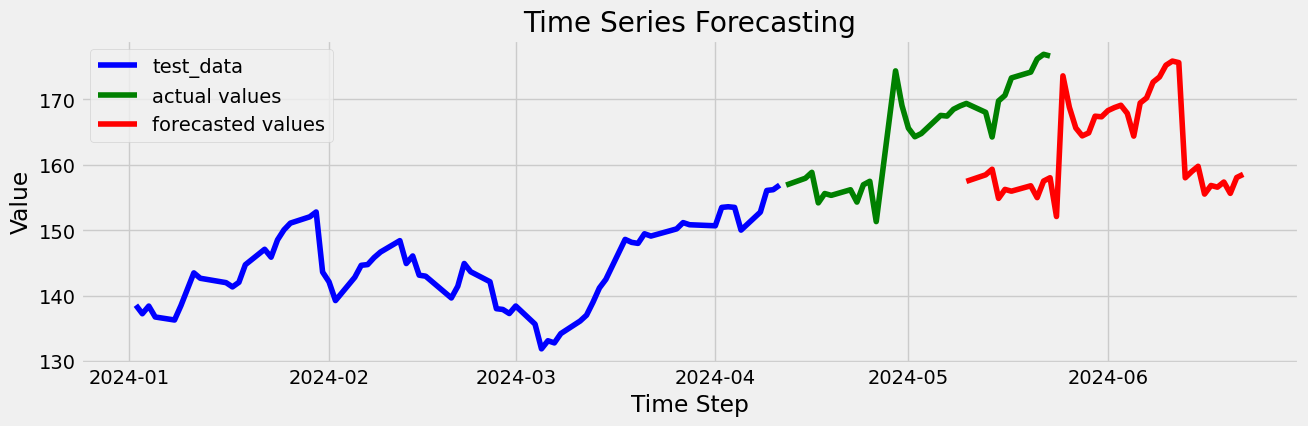

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the plot
plt.rcParams['figure.figsize'] = [14, 4]

# Test data
plt.plot(test_data.index[-100:-30], test_data.Open[-100:-30], label="test_data", color="b")

# Reverse the scaling transformation
original_cases = scaler.inverse_transform(np.expand_dims(sequence_to_plot[-1], axis=0)).flatten()

# The historical data used as input for forecasting
plt.plot(test_data.index[-30:], original_cases, label='actual values', color='green')

# Forecasted Values
# Reverse the scaling transformation
forecasted_cases = scaler.inverse_transform(np.expand_dims(forecasted_values, axis=0)).flatten()

# Ensure combined_index is aligned with forecasted_cases
aligned_combined_index = combined_index[-len(forecasted_cases):]

# Plotting the forecasted values
plt.plot(aligned_combined_index, forecasted_cases, label='forecasted values', color='red')

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Forecasting')
plt.grid(True)
plt.show()
